### DSO 510 Final Project : How Education Could Affect Career Success
Team Members : Delin Zhu, Ziyue Wang, Xu Zhu, Chris Jooyoung Cho, Jiaming Pei, Shao Xuan Chew

# Analyzing the Data

### 1. Preparing and Cleaning the Data
#### 1a. Importing Packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
import statsmodels.formula.api as smf


#### 1b. Read Dataset

In [2]:
employee = pd.read_csv("Employee-Attrition.csv")
employee.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


#### 1c. Creating a dummy variable for Gender and dropping unnecessary columns

In [3]:
employee['isMale'] = [1 if i=="Male" else 0 for i in employee['Gender']]
employee = employee[['MonthlyIncome', 'isMale', 'JobRole', 'Department', 'Education', 'EducationField', 'JobLevel', 'TotalWorkingYears']]

#### 1d. Create Dummy Variables for each Education Level

In [4]:
d1_employee = pd.get_dummies(employee, prefix='edu', columns=['Education'])
d1_employee.drop(axis=1, labels=['edu_1'], inplace=True)
d1_employee

,MonthlyIncome,isMale,JobRole,Department,EducationField,JobLevel,TotalWorkingYears,edu_2,edu_3,edu_4,edu_5
0,5993,0,Sales Executive,Sales,Life Sciences,2,8,1,0,0,0
1,5130,1,Research Scientist,Research & Development,Life Sciences,2,10,0,0,0,0
2,2090,1,Laboratory Technician,Research & Development,Other,1,7,1,0,0,0
3,2909,0,Research Scientist,Research & Development,Life Sciences,1,8,0,0,1,0
4,3468,1,Laboratory Technician,Research & Development,Medical,1,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,1,Laboratory Technician,Research & Development,Medical,2,17,1,0,0,0
1466,9991,1,Healthcare Representative,Research & Development,Medical,3,9,0,0,0,0
1467,6142,1,Manufacturing Director,Research & Development,Life Sciences,2,6,0,1,0,0
1468,5390,1,Sales Executive,Sales,Medical,2,17,0,1,0,0


#### 1e. Education Fields

In [5]:
print('Education Fields')
print(*(f'{i} - {field}' for i, field in enumerate(d1_employee['EducationField'].unique())), sep='\n')

Education Fields
0 - Life Sciences
1 - Other
2 - Medical
3 - Marketing
4 - Technical Degree
5 - Human Resources


#### 1f. Clean JobRole field, add department information to manager titles to indicate manager's field

In [6]:
titles = []

for i in range(len(d1_employee['JobRole'])):
    if d1_employee.loc[i, 'JobRole'] == 'Manager':
        depart = d1_employee.loc[i, 'Department']
        new_title = depart + ' Manager'
        titles.append(new_title)
    else:
        titles.append(d1_employee.loc[i, 'JobRole'])

d1_employee['JobRole'] = titles
print('Job Roles')
print(*(f'{i} - {role}' for i, role in enumerate(d1_employee['JobRole'].unique())), sep='\n')
    

Job Roles
0 - Sales Executive
1 - Research Scientist
2 - Laboratory Technician
3 - Manufacturing Director
4 - Healthcare Representative
5 - Sales Manager
6 - Sales Representative
7 - Research Director
8 - Research & Development Manager
9 - Human Resources
10 - Human Resources Manager


#### 1g. Add column to indicate if the employee's education field is Relevant to their job

In [7]:
# Creating the is_match variable
match_dic = {
    'Life Sciences': ['Research Scientist', 'Healthcare Representative', 'Research Director', 'Research & Development Manager'],
    'Medical': [ 'Research Scientist', 'Laboratory Technician', 'Research Director', 'Research & Development Manager'],
    'Marketing' : ['Sales Executive', 'Sales Manager', 'Sales Representative'],
    'Technical Degree': ['Research Scientist', 'Laboratory Technician', 'Research Director', 'Research & Development Manager'],
    'Human Resources': ['Human Resources', 'Human Resources Manager'],
    'Other': ['']
}

is_match = []
for i in range(len(d1_employee['EducationField'])):
    match = 0
    if d1_employee.loc[i, 'JobRole'] in match_dic[d1_employee.loc[i, 'EducationField']]:
        match = 1
    is_match.append(match)
d1_employee['is_match'] = is_match
# d_employee.loc[:, ['JobRole', 'is_match']]

employee = d1_employee

#### 1h. Creating Dummies for whether an employee is senior, or junior

In [8]:
"""
We want to also see the interaction between background matching and department.
Creating dummies for experience level(new grad: 0-2 years, junior: 2-10 years, senior: 10+ years)
"""

d1_employee['is_junior'] = [1 if (i > 2) & (i <= 10) else 0 for i in d1_employee['TotalWorkingYears']]
d1_employee['is_senior'] = [1 if (i > 10) else 0 for i in d1_employee['TotalWorkingYears']]

### 2. Exploratory Data Analysis

#### 2a. Studying The Relevancy Of Education And Job Role Across Departments 

In [9]:
"""
We want to also see the interaction between background matching and department.
Creating dummies for experience level(new grad: 0-2 years, junior: 2-10 years, senior: 10+ years)
"""

d1_employee['is_junior'] = [1 if (i > 2) & (i <= 10) else 0 for i in d1_employee['TotalWorkingYears']]
d1_employee['is_senior'] = [1 if (i > 10) else 0 for i in d1_employee['TotalWorkingYears']]

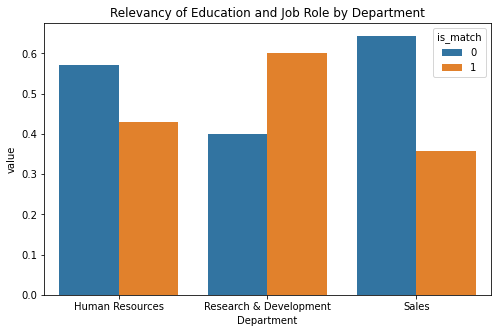

In [10]:
ctb = pd.crosstab(employee['is_match'], employee['Department'], normalize='columns')
stacked = ctb.stack().reset_index().rename(columns={0: 'value'})

fig = plt.figure(figsize=(8, 5))
sns.barplot(data=stacked, y='value', x= 'Department', hue='is_match')
plt.title('Relevancy of Education and Job Role by Department')
plt.show()

#### 2b. Average Income By Department

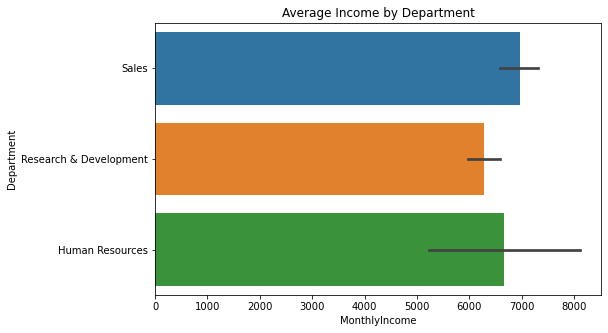

In [11]:
fig = plt.figure(figsize=(8, 5))
sns.barplot(data=employee, y='Department', x='MonthlyIncome', estimator=np.mean, order=employee['Department'].unique())
plt.title('Average Income by Department')
plt.show()


#### 2c. Years Working and Income

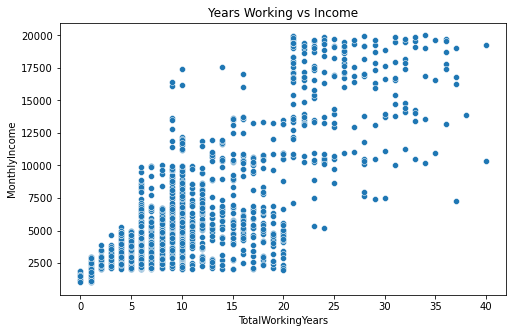

In [12]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(data=employee, x='TotalWorkingYears', y='MonthlyIncome')
plt.title('Years Working vs Income')
plt.show()


#### 2d. Matching Education vs Income

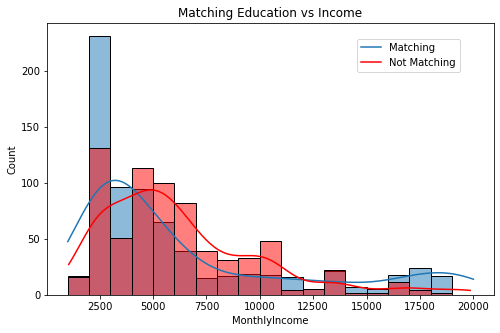

In [13]:
fig = plt.figure(figsize=(8, 5))

sns.histplot(employee[employee['is_match'] == 1], x='MonthlyIncome', kde=True, bins=range(1000, 20000, 1000))
sns.histplot(employee[employee['is_match'] == 0], x='MonthlyIncome', kde=True, color='red', bins=range(1000, 20000, 1000))
plt.title('Matching Education vs Income')
fig.legend(labels=['Matching', 'Not Matching'], loc="upper right", bbox_to_anchor=(.85,0.85))

plt.show()


#### 2e. Identifying Wage Outliers For Each JobLevel

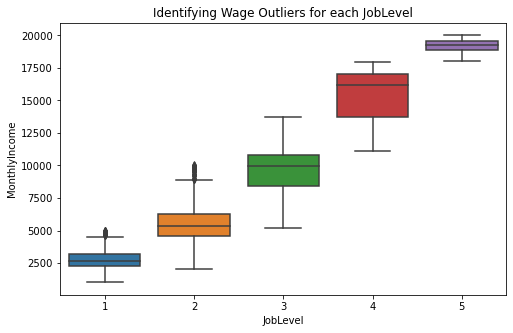

In [14]:
fig = plt.figure(figsize=(8, 5))
sns.boxplot(data=employee, x='JobLevel', y='MonthlyIncome')
plt.title('Identifying Wage Outliers for each JobLevel')
plt.show()

We can notice that for the jop levels there are a few outliers. Therefore we decided to further investigate JobLevel1 and JobLevel2.

### 2.5 Outlier Detection and Removal

#### 2.5a. Identifying Outliers for JobLevel 1 and 2 using the 1.5 IQR method

In [15]:
# identifying outliers for JobLevel 1 using the 1.5 IQR method
l1 = employee[employee['JobLevel']==1].copy()
Q1 = l1['MonthlyIncome'].quantile(0.25)
Q3 = l1['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
l1_outliers = l1[(l1['MonthlyIncome'] > 1.5 * IQR + Q3) |
                 (l1['MonthlyIncome'] < Q1 - 1.5 * IQR)]

l1['is_outlier'] = np.where((l1['MonthlyIncome'] > 1.5 * IQR + Q3) |
                            (l1['MonthlyIncome'] < Q1 - 1.5 * IQR), 1, 0)
l1.head()


,MonthlyIncome,isMale,JobRole,Department,EducationField,JobLevel,TotalWorkingYears,edu_2,edu_3,edu_4,edu_5,is_match,is_junior,is_senior,is_outlier
2,2090,1,Laboratory Technician,Research & Development,Other,1,7,1,0,0,0,0,1,0,0
3,2909,0,Research Scientist,Research & Development,Life Sciences,1,8,0,0,1,0,1,1,0,0
4,3468,1,Laboratory Technician,Research & Development,Medical,1,6,0,0,0,0,1,1,0,0
5,3068,1,Laboratory Technician,Research & Development,Life Sciences,1,8,1,0,0,0,0,1,0,0
6,2670,0,Laboratory Technician,Research & Development,Medical,1,12,0,1,0,0,1,0,1,0


In [16]:
# identifying the outliers for JobLevel 2 using the 1.5 IQR method
l2 = employee[employee['JobLevel'] == 2].copy()
Q1 = l2['MonthlyIncome'].quantile(0.25)
Q3 = l2['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
l2_outliers = l2[(l2['MonthlyIncome'] > 1.5 * IQR + Q3) |
                 (l2['MonthlyIncome'] < Q1 - 1.5 * IQR)]
l2['is_outlier'] = np.where((l2['MonthlyIncome'] > 1.5 * IQR + Q3) |
                            (l2['MonthlyIncome'] < Q1 - 1.5 * IQR), 1, 0)
l2.head()


,MonthlyIncome,isMale,JobRole,Department,EducationField,JobLevel,TotalWorkingYears,edu_2,edu_3,edu_4,edu_5,is_match,is_junior,is_senior,is_outlier
0,5993,0,Sales Executive,Sales,Life Sciences,2,8,1,0,0,0,0,1,0,0
1,5130,1,Research Scientist,Research & Development,Life Sciences,2,10,0,0,0,0,1,1,0,0
9,5237,1,Healthcare Representative,Research & Development,Medical,2,17,0,1,0,0,0,0,1,0
11,4193,0,Laboratory Technician,Research & Development,Life Sciences,2,10,1,0,0,0,0,1,0,0
20,4011,0,Manufacturing Director,Research & Development,Other,2,5,1,0,0,0,0,1,0,0


#### 2.5b. Analyzing Outliers in JobLevel1 and 2

<AxesSubplot:xlabel='is_outlier', ylabel='TotalWorkingYears'>

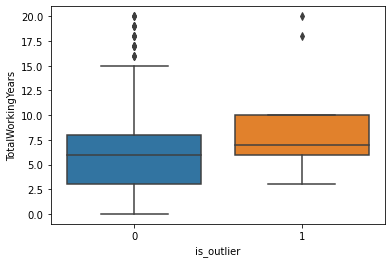

In [17]:
# outliers in JobLevel 1 do not exibit significant difference in working years
sns.boxplot(data=l1, x='is_outlier', y='TotalWorkingYears')


<AxesSubplot:xlabel='is_outlier', ylabel='TotalWorkingYears'>

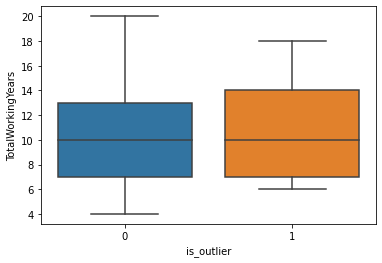

In [18]:
# outliers in JobLevel 2 do not exibit significant difference in working years
sns.boxplot(data=l2, x='is_outlier', y='TotalWorkingYears')


#### Remove Outliers

In [19]:
d1_employee = pd.merge(d1_employee, l1_outliers, indicator=True, how='outer')\
      .query('_merge=="left_only"')\
      .drop('_merge', axis=1)
d1_employee = pd.merge(d1_employee, l2_outliers, indicator=True, how='outer')\
    .query('_merge=="left_only"')\
    .drop('_merge', axis=1)


### 3. Statistical Analysis

### Model 1 : Education Level and is_match

In [20]:
# Running OLS based on education level and is_match
explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     364.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          3.65e-286
Time:                        20:19:51   Log-Likelihood:                -13845.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1463   BIC:                         2.774e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1406.8494    260.23

In this model, we observe that the employees' relevant background is positively correlated with their salary. However, the relationship is not statistically significant. 

Counterintuitively, a higher education level is negatively correlated with the salary, though the relationship is also not statistically significant. A possible explanation to why a higher education level is negatively correlated with salary could be due to how specific education levels are expected and valued differently across different job types along with seniority levels. For instance, job experience might be a bigger factor to consider over job relevance especially for managerial roles. 

Therefore, we will further examine the relationship between different job seniority levels along with the various departments.

### Model 2 : Education level and is_match for only senior employees (>10 years)

In [21]:
# Running OLS based on education level and is_match, filtering only senior employees
employee = d1_employee
employee = employee.loc[(employee['TotalWorkingYears'] > 10)]
explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     78.96
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           2.34e-70
Time:                        20:19:51   Log-Likelihood:                -5228.6
No. Observations:                 538   AIC:                         1.047e+04
Df Residuals:                     531   BIC:                         1.050e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -353.7444    828.05

In this model, we focus on employees with more than 10 years of work experience as the sample. We examine the relationship between total working years and education level to see whether a statistically significant correlation can be found. From the results, we can see a statistically significant and positive correlation between the matched education background and salary. 

However, the p-value of the constant is greater than the significance level at 0.05. This means that we do not have sufficient evidence to conclude that employees with the lowest level of education are correlated with their salary performance.

Furthermore, with the updated sample scope, the R-squared value is lower relative to Model 1. Therefore, we should explore other models.


### Model 3 : Education level and is_match for Junior employees (2 < years < 10)

In [22]:
# Running OLS based on education level and is_match, filtering only junior employees
employee = d1_employee
employee = employee.loc[(employee['TotalWorkingYears'] > 2) & (employee['TotalWorkingYears'] <= 10)]

explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     40.24
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.20e-42
Time:                        20:19:51   Log-Likelihood:                -6966.8
No. Observations:                 771   AIC:                         1.395e+04
Df Residuals:                     764   BIC:                         1.398e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1484.6073    313.70

For this model, we focus only on employees who have had at least 2 but not more than 10 years of work experience at the company. Initially, we found that these junior level employees who have a base education level and a job-relevant education background have a statistically significant correlation with salary in the model. A relevant education background on average reduces the salary by $653.46.

In order to validate this, we studied the p-values of the junior employees with higher education levels and found insufficient evidence to conclude that those who received advanced education would be significantly correlated with their salary performance except for those with a PhD.

Even though this model shows that Junior employees with a PhD has a statistically significant correlation with salary, we also note that R-squared has reduced to 0.24, which suggests a possible bias to to a smaller sample size. Hence, we will continue looking at other factors.



### Model 4 : Education level and is_match for only New Grad employees ($\leq$ 2 years)

In [23]:
# Running OLS based on education level and is_match, filtering only new_grad employees
employee = d1_employee
employee = employee.loc[(employee['TotalWorkingYears'] <= 2)]

explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     6.197
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.15e-05
Time:                        20:19:51   Log-Likelihood:                -946.12
No. Observations:                 123   AIC:                             1906.
Df Residuals:                     116   BIC:                             1926.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1604.0782    154.53

Continuing on with the segregated models, we now focus on fresh graduates with less than or equal to 2 year years of work experience in the company. Neither is_match nor any of the education levels yielded a statistically significant result indicating education's impact on salary.

As a conclusion to the models thus far, there is no statistically significant coefficient on relevant education background and education levels. The R-squared scores are all lower relative to the base model done on the entire population. In addition, our job-level variables were generated from "total working years", which potentially caused multicollinearity issues and reduced the explanatory power of those variables in the model.


### Model 5 : Education level and is_match for only the Sales Department

In [24]:
# Focus on the Sales department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Sales')]

explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.32e-88
Time:                        20:19:51   Log-Likelihood:                -3991.7
No. Observations:                 432   AIC:                             7997.
Df Residuals:                     425   BIC:                             8026.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2108.9166    387.52

None of the education level and education relevance variables show statistically significance in this model.

Education level as well as the relevancy of the education field have very little explanatory power in terms of understanding teh salary of Sales Department employees. This is despite the matching education background and higher education level being associated with a higher salary.

### Model 6 : Education level and is_match for only the Research and Development Department

In [25]:
# Focus on the Research & Development department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Research & Development')]

explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          5.80e-182
Time:                        20:19:51   Log-Likelihood:                -8877.7
No. Observations:                 938   AIC:                         1.777e+04
Df Residuals:                     931   BIC:                         1.780e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               802.4251    351.65

Within the R&D Department, employees with a base education level and a job-relevant background have a statistically significant positive correlation with salary in this model. A relevant education background results in an average salary increase of $561.93. 

The R&D department consists of roles like Research Scientist, Lab Manager, and Technician. These roles generally require specialized training and domain knowledge, which could explain the increase in salary for those who hold relevant skill sets.

Counterintuitively, the various education levels do not make a statistically significant difference in explaining the employees' salaries.

### Model 7 : Education level and is_match for only the Huamn Resources Department

In [26]:
# Focus on the Human Resources department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Human Resources')]

explan_vars = ['is_match', 'TotalWorkingYears']

for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
X = employee.loc[:, explan_vars]
y = employee.loc[:, 'MonthlyIncome']

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     38.19
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           6.78e-18
Time:                        20:19:51   Log-Likelihood:                -574.17
No. Observations:                  62   AIC:                             1162.
Df Residuals:                      55   BIC:                             1177.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -325.7362   1259.16

Similar to Model 6's findings, a relevant education background or higher education background does not lead to a higher salary for employees in the HR department, as none of the education level and relevance variables show statistical significance in this model.

## Models 8-10: Adding interaction between Job Level and Department to our model to test our previous findings

### Model 8 : Education level and is_match, interaction between Job Level and Sales Department

In [27]:
# Sales department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Sales')]

explan_vars = ['is_match', 'is_junior * TotalWorkingYears',
               'is_senior * TotalWorkingYears']
formula = 'MonthlyIncome ~ '
for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
for each in explan_vars[:-1]:
    formula += (each + ' + ')
formula += explan_vars[-1]
# print(formula)
X = sm.add_constant(X)
result = smf.ols(
    formula=formula, data=employee).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     77.78
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.32e-89
Time:                        20:19:51   Log-Likelihood:                -3979.7
No. Observations:                 432   AIC:                             7981.
Df Residuals:                     421   BIC:                             8026.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Model 9 : Education level and is_match, interaction between Job Level and Research & Development Department

In [28]:
# Research & Development department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Research & Development')]

explan_vars = ['is_match', 'is_junior * TotalWorkingYears',
               'is_senior * TotalWorkingYears']
formula = 'MonthlyIncome ~ '
for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
for each in explan_vars[:-1]:
    formula += (each + ' + ')
formula += explan_vars[-1]
# print(formula)
X = sm.add_constant(X)
result = smf.ols(
    formula=formula, data=employee).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     144.1
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          4.07e-181
Time:                        20:19:51   Log-Likelihood:                -8868.9
No. Observations:                 938   AIC:                         1.776e+04
Df Residuals:                     927   BIC:                         1.781e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Model 10 : Education level and is_match, interaction between Job Level and Human Resources  Department


In [29]:
# Human Resources department
employee = d1_employee
employee = employee.loc[(employee['Department'] == 'Human Resources')]

explan_vars = ['is_match', 'is_junior * TotalWorkingYears',
               'is_senior * TotalWorkingYears']
formula = 'MonthlyIncome ~ '
for i in employee.columns:
    if 'edu_' in i:
        explan_vars.append(i)
for each in explan_vars[:-1]:
    formula += (each + ' + ')
formula += explan_vars[-1]
# print(formula)
X = sm.add_constant(X)
result = smf.ols(
    formula=formula, data=employee).fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     23.25
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.21e-15
Time:                        20:19:51   Log-Likelihood:                -571.90
No. Observations:                  62   AIC:                             1166.
Df Residuals:                      51   BIC:                             1189.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Based on Models 8, 9, and 10, we can validate our findings on the correlation relationships discussed in the previous models.

### Key Takeaways

#### Summary of the overall impact of education level and relevance of education field
<ul>
  <li>A higher education level does not necessarily link to a higher salary, as we merely observed one positive correlation with senior level employees and this is better explained by how education becomes a key differentiator in deciding salary for this level. Furthermore, junior-level employees with a doctorate degree have a higher average salary. Ultimately, this could be due to the small sample size of employees with a PhD, which amplifies the effect of an advanced academic degree.</li>
  <li>Having a relevant education background makes sense when it comes to explaining the salary of R&D employees. The technical and specialized roles within this department generally require expertise within their field. </li>
  <li>On the contrary, HR and Sales place more value on work experience, as total working years are more significant predictors of salary. This could be due to the less technical nature of these roles that benefit more from having more years of practical experience.</li>
</ul>

#### Does it confirm or challenge our previous belief?
<ul>
    <li>Challenge : Education is not a significant predictor of salary.</li>
</ul>

#### Business Implications of the findings
<ul>
  <li>The impact of education on salary should consider how work experience has a more significant impact on salary along with how different functions of work value education differently.</li>
  <li>When making hiring or job promotion decisions, companies should weigh education differently in the evaluation of candidates or employees based on the specific needs of their roles.</li>
</ul>

#### Potential Improvements
<ul>
  <li>Aside from the academic attainments of the employees, on-job training has been a crucial factor linked to workplace success measured in salary. This dataset fails to provide insight of the total training time of employees, having only the previous year's training information.</li>
  <li>A candid performance rating system could be a good control variable that increases the total statistical significance of the model and accounts for the uninterpreted variation. However, the performance rating in this dataset lacks depth with only either "Good" or "Outstanding".</li>
  <li>Some employees could have entered the company with matching previous job experience that this dataset does not account for. This could be a factor that leads to a higher salary even with a mismatched education background. It is entirely possible that one has gained skills necessary for their new role from their work experience instead of school.</li>
  <li>The sample size is also fairly limited.</li>
</ul>